In [24]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('complete_data_EM_3.csv')

In [30]:
df.head()

,Unnamed: 0,Acousticness,Danceability,Duration Ms,Energy,Instrumentalness,Liveness,Loudness,Popularity,Speechiness,Tempo,Valence,Records,Artist_clean,Album,Continent,Country,Rank
0,1,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,6ix9ine,GOOBA,Australia,Australia,23
1,2,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,6ix9ine,GOOBA,Europe,Austria,5
2,3,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,6ix9ine,GOOBA,Europe,Belgium,8
3,4,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,6ix9ine,GOOBA,Europe,Bulgaria,1
4,5,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,6ix9ine,GOOBA,North America,Canada,12


In [57]:
#list artists and number of unique countries they had top songs in
artist_country = pd.DataFrame({"Artist_clean": df['Artist_clean'],
                                "Country": df['Country']
})
artist_country = artist_country.groupby(['Artist_clean']).nunique()[('Country')].sort_values(ascending=False)
artist_country = pd.DataFrame(artist_country)

artist_country.head()


artist_country_drop = artist_country.loc[artist_country['Country'] > 10]

artist_country_drop = artist_country_drop[('Country')].sort_values(ascending=False)

artist_country_drop.head()

artist_country_drop = pd.DataFrame(artist_country_drop)

Text(0.5, 1.0, 'Country per Artist')

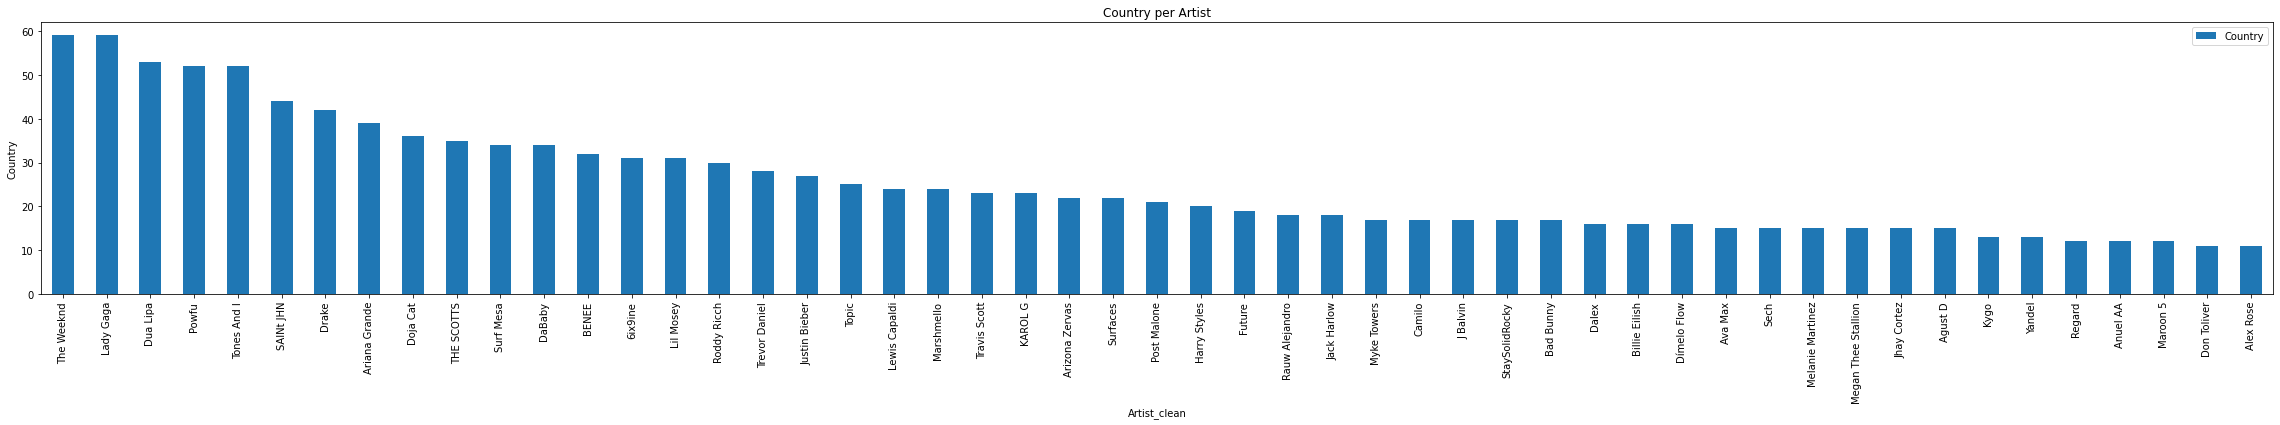

In [58]:
artist_country_drop.plot(kind="bar", figsize=(40,5))
plt.ylabel("Country")
plt.xlabel("Artist_clean")
plt.title("Country per Artist")

In [18]:
artist_country.value_counts

<bound method IndexOpsMixin.value_counts of Artist_clean
The Weeknd        59
Lady Gaga         59
Dua Lipa          53
Powfu             52
Tones And I       52
                  ..
H.E.R.             1
NAV                1
Hikaru Utada       1
Mustard            1
Kelly Clarkson     1
Name: Country, Length: 189, dtype: int64>

In [ ]:
#list artists and number of unique countries they had top songs in
artist_rank = pd.DataFrame({"Artist_clean": df['Artist_clean'],
                                "Rank": df['Rank'].mean()
})
artist_country = artist_country.groupby(['Artist_clean']).nunique()[('Country')].sort_values(ascending=False)
artist_country = pd.DataFrame(artist_country)

artist_country.head()


artist_country_drop = artist_country.loc[artist_country['Country'] > 10]

artist_country_drop = artist_country_drop[('Country')].sort_values(ascending=False)

artist_country_drop.head()

artist_country_drop = pd.DataFrame(artist_country_drop)

In [93]:
artist_rank = pd.DataFrame({"Artist_clean": df['Artist_clean'], 
                            "Continent" : df['Continent'],
                            "Country" : df['Country'],
                                "Rank": df['Rank']})

artist_rank = artist_rank.groupby(['Continent','Country']).mean()[('Rank')].sort_values(ascending=False)

In [94]:
artist_rank = pd.DataFrame(artist_rank)

artist_rank.head()

,,Rank
Continent,Country,
Europe,Greece,33.000000
Asia,Malaysia,32.809524
Europe,Turkey,29.400000
Asia,Hong Kong,29.375000
Europe,Sweden,28.750000


Text(0.5, 1.0, 'Rank by Artist')

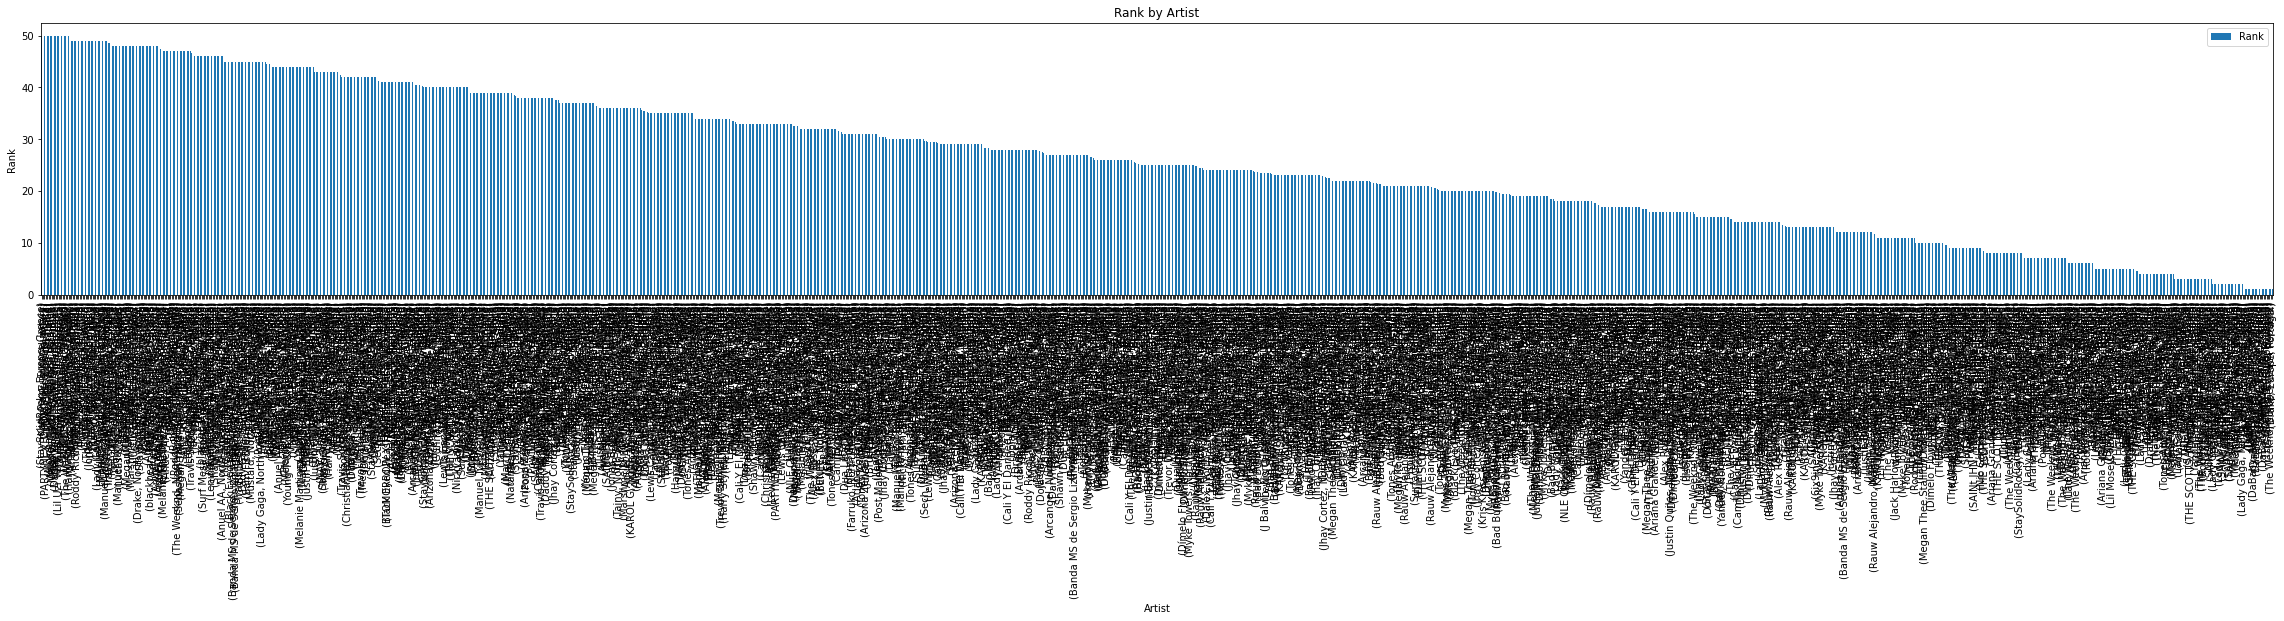

In [92]:
artist_rank.plot(kind="bar", figsize=(40,5), stacked=True)
plt.ylabel("Rank")
plt.xlabel("Artist")
plt.title("Rank by Artist")

In [137]:
artist_rank_2 = pd.DataFrame({"Artist_clean": df['Artist_clean'], 
                            "Continent" : df['Continent'],
                            "Country" : df['Country'],
                                "Rank": df['Rank']})

In [138]:
# artist_rank_2 = artist_rank_2.set_index('Continent')

artist_rank_2 = artist_rank_2.groupby(['Continent','Country','Artist_clean']).agg(['mean'])
artist_rank_2.head(100)

Rank
                                       mean
Continent Country      Artist_clean        
Africa    South Africa 6ix9ine         28.0
                       Ariana Grande   17.0
                       Arizona Zervas  31.0
                       Billie Eilish   37.0
                       Chris Brown     30.0
...                                     ...
Asia      Israel       6ix9ine         25.0
                       Ariana Grande   16.0
                       Arizona Zervas  38.0
                       Billie Eilish   29.0
                       DaBaby           8.0

[100 rows x 1 columns]

In [139]:
artist_rank_2.to_csv("complete_data_Rank.csv")


In [151]:
# artist_rank_artist = artist_rank_2.groupby(['Artist_clean']).agg(['mean'])

artist_rank_artist = artist_rank_2.groupby(['Artist_clean'])



In [152]:
artist_rank_artist.head()


Rank
                                            mean
Continent     Country      Artist_clean         
Africa        South Africa 6ix9ine          28.0
                           Ariana Grande    17.0
                           Arizona Zervas   31.0
                           Billie Eilish    37.0
                           Chris Brown      30.0
...                                          ...
South America Uruguay      Lunay            41.0
                           Nicky Jam        30.0
                           Nio Garcia        9.0
                           Reik             22.0
                           Sebastian Yatra  47.0

[508 rows x 1 columns]

In [153]:
artist_rank_artist.to_csv("complete_data_Rank_new.csv")


AttributeError: 'DataFrameGroupBy' object has no attribute 'to_csv'